<a href="https://colab.research.google.com/github/younus8imran/TSF-GRIP-Internship/blob/master/Task-3%20Predicting%20Optimal%20No.%20of%20Clusters%20using%20KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color='Aqua'>**K-Means Clustering**</font>

<font color="DarkOrange">In this task we'll explore K-Means Algorithm to predict Optimum number of Clusters and represent it Visually</font>

<font color='DarkOrange'>K-Means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset


#### <font color='Yellow'>**Let's import all the necessary libraries**</font>

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

%matplotlib inline

#### <font color='Yellow'>**We'll load the iris Dataset**</font>

In [16]:
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)

X = iris.data
y = iris.target

#### <font color='Yellow'> **Let's have a look at the Dataset**</font>

> Indented block



In [17]:
iris_data.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
100,6.3,3.3,6.0,2.5
58,6.6,2.9,4.6,1.3
128,6.4,2.8,5.6,2.1
13,4.3,3.0,1.1,0.1
149,5.9,3.0,5.1,1.8


In [18]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### <font color='Yellow'> **Let's find the optimum number of clusters**</font>

In [19]:
wcss = []
K = range(1, 11)

for k in K:
    km_model = KMeans(n_clusters = k, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    km_model.fit(X)
    wcss.append(km_model.inertia_)

In [20]:
km_model.cluster_centers_.shape

(10, 4)

In [21]:
km_model.labels_

array([0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 5, 5, 5, 0, 5, 5, 5, 5,
       0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 5, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0,
       5, 0, 5, 0, 5, 0, 8, 8, 8, 9, 8, 3, 8, 7, 8, 9, 7, 3, 9, 3, 9, 8,
       3, 9, 3, 9, 1, 3, 1, 3, 3, 8, 8, 8, 3, 9, 9, 9, 9, 1, 3, 3, 8, 3,
       9, 9, 9, 3, 9, 7, 9, 3, 3, 3, 7, 9, 4, 1, 6, 4, 4, 2, 9, 6, 6, 2,
       4, 1, 4, 1, 1, 4, 4, 2, 2, 1, 4, 1, 2, 1, 4, 6, 1, 1, 4, 6, 6, 2,
       4, 1, 1, 2, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 1, 4, 4, 1], dtype=int32)

<font color='DarkOrange'>We'll be using elbow method to find the optimal value of k, let's plot the results onto a line graph to observe the elbow</font>

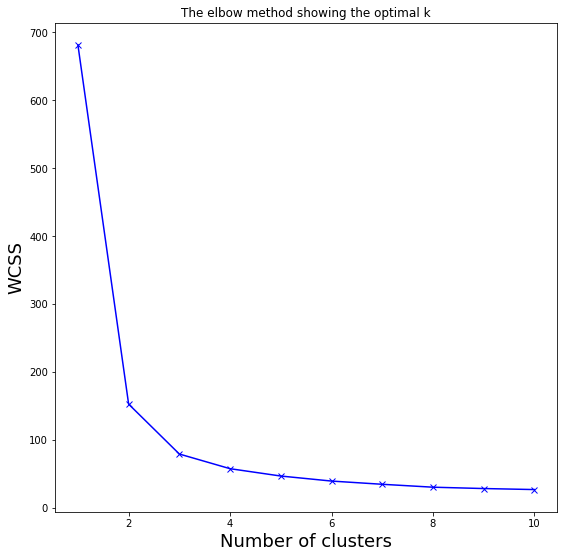

In [22]:
plt.figure(figsize=(9, 9))
plt.plot(K, wcss, 'bx-')
plt.title('The elbow method showing the optimal k')
plt.xlabel('Number of clusters', fontsize=18)
plt.ylabel('WCSS', fontsize=18) # Within cluster sum of squares
plt.show()

<font color='DarkOrange'>In the above plot, we can see there's an elbow created between k=2 and k=4, so, we choose the value of k=3</font>

In [23]:
wcss

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.25600931571815,
 46.44618205128205,
 39.03998724608725,
 34.299712121212124,
 30.014398496240602,
 28.036906353450473,
 26.53452922077922]

<font color='DarkOrange'>Now, that we've got the value of k, let's apply the k-means to the dataset and create predictions

In [24]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

<font color='DarkOrange'>Finally, let's visualize the clusters and cluster centers on the first two columns

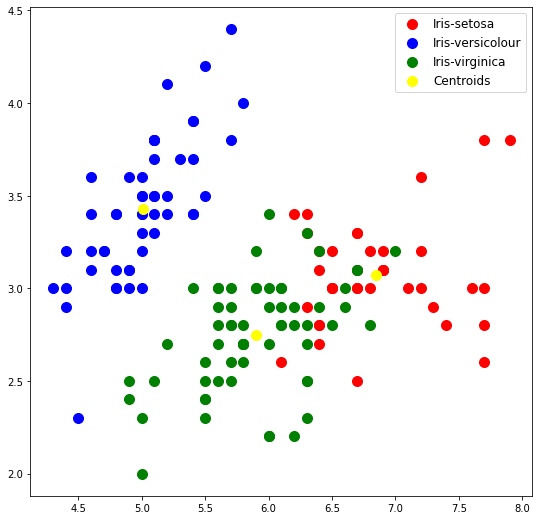

In [26]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(9, 9))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa', cmap='viridis')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour', cmap='viridis')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica', cmap='viridis')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids', cmap='viridis')

plt.legend(fontsize=12)
plt.show()
